# Reading Data

This uses the data format from [Create Parsed CSV](https://colab.research.google.com/drive/14ZGZdJ4xxM0ZAwCE2zGSm0SWC6H6nWXI#scrollTo=eKqSRKQgvq7a)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


## Unzip File

In [2]:
!unzip parsed_patient_data.zip

Archive:  parsed_patient_data.zip
replace parsed_patient_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Read main file

In [13]:
import pandas as pd

df = pd.read_csv("parsed_patient_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449
0,232.0,0.238632,0.238474,0.238414,0.238316,0.238085,0.237769,0.237522,0.237452,0.237516,...,0.012059,0.011989,0.011871,0.011729,0.011601,0.011492,0.011371,0.011241,0.011164,0.011170
1,59.0,0.216471,0.216397,0.216409,0.216444,0.216407,0.216261,0.216068,0.215938,0.215913,...,0.029054,0.029212,0.029524,0.029881,0.030134,0.030255,0.030323,0.030382,0.030409,0.030382
2,213.0,0.109393,0.109271,0.109190,0.109163,0.109112,0.108990,0.108815,0.108614,0.108422,...,0.011896,0.011860,0.011968,0.012149,0.012291,0.012355,0.012395,0.012476,0.012592,0.012688
3,189.0,0.099630,0.099845,0.100284,0.100685,0.100863,0.100841,0.100761,0.100721,0.100710,...,0.012581,0.012648,0.012809,0.012992,0.013140,0.013244,0.013323,0.013401,0.013489,0.013576
4,221.0,0.132230,0.132424,0.132705,0.132855,0.132772,0.132543,0.132363,0.132353,0.132458,...,0.017984,0.018097,0.018312,0.018425,0.018313,0.018070,0.017888,0.017860,0.017904,0.017846


# Parsing Features and Labels

In [ ]:
y = df["0"]
y.head()

In [ ]:
X = df.drop("0", axis=1)
X.head()

## Visualize Data

36.0


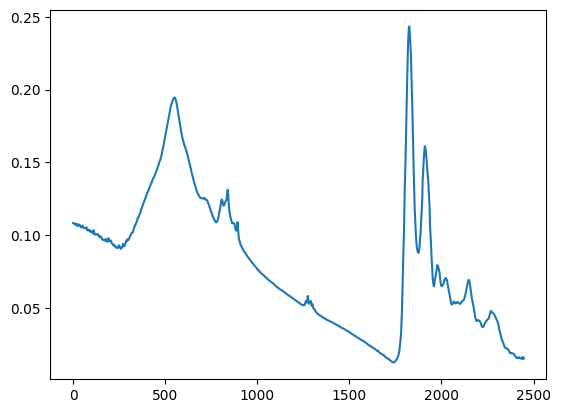

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

def visualize(index):
  print(y[index])
  plt.plot(X.loc[index].tolist())

visualize(7)

## Create `X` and `y` from Data

### Import Tensorflow

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449
310,0.157740,0.157574,0.157293,0.157077,0.157020,0.157032,0.156963,0.156790,0.156623,0.156534,...,0.030691,0.030996,0.031238,0.031372,0.031385,0.031305,0.031226,0.031246,0.031391,0.031597
298,0.111139,0.111047,0.110972,0.110930,0.110953,0.111023,0.111054,0.110959,0.110716,0.110370,...,0.031283,0.031346,0.031415,0.031582,0.031900,0.032322,0.032740,0.033065,0.033276,0.033402
397,0.086077,0.086031,0.086010,0.085971,0.085939,0.085945,0.085954,0.085904,0.085799,0.085712,...,0.025680,0.025879,0.026045,0.026162,0.026244,0.026351,0.026525,0.026701,0.026749,0.026627
347,0.192318,0.192294,0.192420,0.192639,0.192832,0.192892,0.192797,0.192606,0.192424,0.192356,...,0.025884,0.025888,0.025801,0.025664,0.025574,0.025595,0.025711,0.025859,0.025976,0.026024
227,0.154264,0.154169,0.154079,0.154059,0.154105,0.154115,0.153979,0.153728,0.153493,0.153325,...,0.024327,0.024437,0.024531,0.024615,0.024700,0.024782,0.024850,0.024896,0.024920,0.024937


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## Convert to Tensors

In [10]:
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

# Creating Model

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
tf.random.set_seed(50)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

history_1 = model_1.fit(X_train_norm, y_train, epochs=100)

AttributeError: module 'keras.api.losses' has no attribute 'mae'

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_1.evaluate(X_test_norm, y_test)

# Installing TensorflowJS

We need this for when we save models

In [ ]:
!pip install tensorflowjs

### ***MY*** ***STUFF***

In [ ]:
tf.random.set_seed(50)

model_mark = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_mark.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adagrad(),
              metrics=["mae"])
history_mark = model_mark.fit(X_train_norm,
                        y_train,
                        epochs=100)

pd.DataFrame(history_mark.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_mark.evaluate(X_test_norm, y_test)

In [ ]:
tf.random.set_seed(50)

model_mark2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_mark2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.AdamW(),
              metrics=["mae"])
history_mark2 = model_mark2.fit(X_train_norm,
                        y_train,
                        epochs=100)

pd.DataFrame(history_mark2.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_mark2.evaluate(X_test_norm, y_test)

In [ ]:
tf.random.set_seed(50)

model_mark3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_mark3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adamax(),
              metrics=["mae"])
history_mark3 = model_mark3.fit(X_train_norm,
                        y_train,
                        epochs=100)

pd.DataFrame(history_mark3.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_mark3.evaluate(X_test_norm, y_test)

In [ ]:
tf.random.set_seed(50)

model_mark4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_mark4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=["mae"])
history_mark4 = model_mark4.fit(X_train_norm,
                        y_train,
                        epochs=100)

pd.DataFrame(history_mark4.history).plot()
plt.ylabel("Loss Function")
plt.xlabel("Epochs")
model_mark4.evaluate(X_test_norm, y_test)